# Como executar uma Máquina de Turing?

Para executar a Máquina de Turing do exemplo anterior, siga os passos abaixo:

1. Inicie no estado q0 com o cabeçalho de leitura/escrita posicionada no primeiro símbolo da cadeia de
entrada (o símbolo mais a esquerda).

2. Leia o símbolo sob o cabeçalho. Utilize a tabela de transição para determinar a ação a ser tomada
(escrever um símbolo, mover a cabeça, e mudar de estado).

3. Repita o passo 2 até que a máquina atinja o estado final qf ou até que não haja mais transições possíveis, indicando que a cadeia de entrada não é aceite pela máquina.

Este processo demonstra como a Máquina de Turing pode decidir sobre a aceitação de cadeias de caracteres
seguindo um conjunto definido de regras. Qualquer cadeia de entrada que faz com que a máquina atinja o
estado qf é uma entrada válida para qual o output poderá ser computado.

# Sessão prática

Durante a sessão prática devem implementar código Python para definir e executar uma máquina de Turing.

Para tal terão de definir uma forma de representar o programa (condições e ações) utilizando, por exem-
plo, um ficheiro .CSV e guardar numa variável adequada program. A seguir terão de escrever uma função
get_action(condition, program) que dada uma condição devolve a ação que deve ser executada. No
passo seguinte terão de pensar em como representar a máquina, nomeadamente a fita com o seu input, onde
está o cabeçalho e o estado interno inicial. Logo vão precisar duma função update_machine que, dado o
programa e a máquina no seu estado atual, devolva a máquina depois de executar uma ação. A última
função que vão precisar será run_machine a qual recebe a máquina no seu estado inicial e o programa, e
executa cada paso, imprimindo todas as informações (fita, posição do cabeçalho e estado interno) até atingir
o estado final, ou um estado para o qual não há ação (breakpoint). Há várias formas válidas de implementar
uma máquina de Turing. def run_machine(maquina, program)

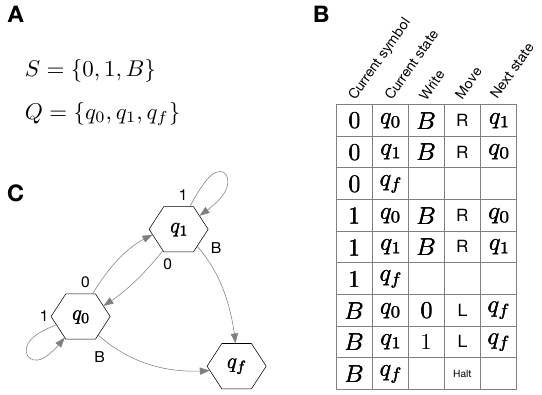

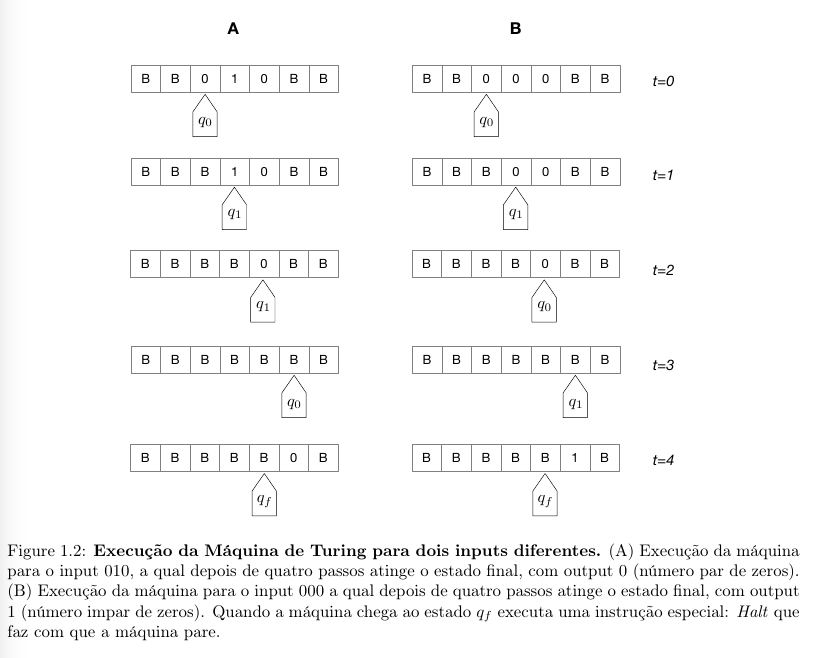

In [2]:
# Turing Machine

# Tape: 
#   one dimensional array of cells 
#   {0, 1, B}

# Program: 
#   CSV

# State 
#   - q0: máquina em reset
#   - q1: Read
#   - qf: Final

# Head
#   - Read
#   - Write

# Step
#   - Move
#   - State


"""

q0 
representa máquina em reset, 
o qual acontece no início
e cada vez que a máquina encontrou, 
até onde estiver o cabecalho, um número par de zeros

q1 
representa
que a máquina encontrou, 
até onde estiver o cabecalho, 
um número impar de zeros

qf 
representa que a cadeia de entrada foi 
processada completamente

(B) - csv  
A partir dos símbolos e dos estados internos,
temos de producir uma tabela de instruções que 
inicialmente contêm todos os pares possíveis de símbolo e estado.

Cada um destes pares é referido como condição. 
Para cada condição útil na execução do algoritmo, o
programador define uma acção que deve ter 
três partes: 
o que o cabecalho tem de escrever na fita, 
para onde se vai mover (esquerda ou direita), 
e qual o seu novo estado interno. 

É importante destacar que esta máquina
específica não precisou usar todas as condições. 

Note que, por exemplo, a máquina não considera possível o
encontrar-se numa situação na qual esteja a ler o 
símbolo 0 no estado qf . 
Um programa que funciona numa máquina de Turing 
não precisa de usar todas as condições possíveis 
definidas pelos conjuntos de símbolos e estados internos. 

(C) 
uma forma adequada de representar e avaliar máquinas 
no geral é conhecida como
diagrama de transição de estados que vamos 
estudar em detalhe nas nossas aulas.

"""



'\n\nq0 \nrepresenta máquina em reset, \no qual acontece no início\ne cada vez que a máquina encontrou, \naté onde estiver o cabecalho, um número par de zeros\n\nq1 \nrepresenta\nque a máquina encontrou, \naté onde estiver o cabecalho, \num número impar de zeros\n\nqf \nrepresenta que a cadeia de entrada foi \nprocessada completamente\n\n(B) - csv  \nA partir dos símbolos e dos estados internos,\ntemos de producir uma tabela de instruções que \ninicialmente contêm todos os pares possíveis de símbolo e estado.\n\nCada um destes pares é referido como condição. \nPara cada condição útil na execução do algoritmo, o\nprogramador define uma acção que deve ter \ntrês partes: \no que o cabecalho tem de escrever na fita, \npara onde se vai mover (esquerda ou direita), \ne qual o seu novo estado interno. \n\nÉ importante destacar que esta máquina\nespecífica não precisou usar todas as condições. \n\nNote que, por exemplo, a máquina não considera possível o\nencontrar-se numa situação na qual est

In [1]:
from csv import reader

# Read program from csv 'program.csv' into a list of tuples

def read_program(filename='program.csv'):
    program = []
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            program.append(
                (
                    row[0], # Current Symbol S = {0, 1, B}
                    row[1], # Current State Q = {q0, q1, qf} 
                    row[2], # Write Symbol {0, 1, B}
                    row[3], # Move (L/R)
                    row[4]  # Next State {q0, q1, qf}
                ))
    return program

print('Program:')
print('Current Symbol | Current State | Write Symbol | Move | Next State')
def print_program(program):
    for row in program:
        print(row)
    
print_program(read_program())

Program:
Current Symbol | Current State | Write Symbol | Move | Next State
('0', 'q0', 'B', 'R', 'q1')
('0', 'q1', 'B', 'R', 'q0')
('1', 'q0', 'B', 'R', 'q0')
('1', 'q1', 'B', 'R', 'q1')
('B', 'q0', '0', 'L', 'qf')
('B', 'q1', '1', 'L', 'qf')


In [5]:
program = read_program()

args_0 = {program[0][0]:program[0][1]}
args_1 = {program[1][0]:program[1][1]}
args_2 = {program[2][0]:program[2][1]}
args_3 = {program[3][0]:program[3][1]}
args_4 = {program[4][0]:program[4][1]}
args_5 = {program[5][0]:program[5][1]}

print(args_4)

{'B': 'q0'}


In [2]:
class turing_machine:
  def __init__(self, tape, program = read_program()):
    self.tape = tape
    self.head = 0 # indice do cabeçalho
    self.state = program[0][1] # estado inicial q0 
    self.program = program
    self.counter = 0 # contador de numero par de zeros
    self.simbols = ['0', '1' 'B']  

  def __str__(self):
    return f'Tape: {self.tape},\n Head: {self.head},\n State: {self.state},\n Counter: {self.counter}\n'
  
  def get_tape(self):
    return self.tape

  def corre_programa(self):
    while self.state != 'qf':
      #for self.head in self.tape:
      if self.tape[self.head] == self.program[0][0] and self.state == self.program[0][1]:
        self.state = self.program[0][4]
        self.tape[self.head] = self.program[0][2]
        self.head += 1
        print(self)
      elif self.tape[self.head] == self.program[1][0] and self.state == self.program[1][1] and self.head < len(self.tape):
        self.state = self.program[1][4]
        self.tape[self.head] = self.program[1][2]
        self.head += 1
        self.counter += 1
        print(self)
      elif self.tape[self.head] == self.program[2][0] and self.state == self.program[2][1] and self.head < len(self.tape):
        self.state = self.program[2][4]
        self.tape[self.head] = self.program[2][2]
        self.head += 1     
        print(self)
      elif self.tape[self.head] == self.program[3][0] and self.state == self.program[3][1] and self.head < len(self.tape):
        self.state = self.program[3][4]
        self.tape[self.head] = self.program[3][2]
        self.head += 1
        print(self)
      elif self.tape[self.head] == self.program[4][0] and self.state == self.program[4][1] and self.head < len(self.tape):
        self.state = self.program[4][4]
        self.tape[self.head] = self.program[4][2]
        self.head -= 1
        print(self)
      elif self.tape[self.head] == self.program[5][0] and self.state == self.program[5][1] and self.head < len(self.tape):
        self.state = self.program[5][4]
        self.tape[self.head] = self.program[5][2]
        self.head -= 1
        print(self)
    return self.tape

tape = ['0', '0', '0', '1', '0', '1', '1', 'B', 'B', 'B']
t = turing_machine(tape)
print(t)
new = t.corre_programa()
print(t)
print(t.get_tape())

Tape: ['0', '0', '0', '1', '0', '1', '1', 'B', 'B', 'B'],
 Head: 0,
 State: q0,
 Counter: 0

Tape: ['B', '0', '0', '1', '0', '1', '1', 'B', 'B', 'B'],
 Head: 1,
 State: q1,
 Counter: 0

Tape: ['B', 'B', '0', '1', '0', '1', '1', 'B', 'B', 'B'],
 Head: 2,
 State: q0,
 Counter: 1

Tape: ['B', 'B', 'B', '1', '0', '1', '1', 'B', 'B', 'B'],
 Head: 3,
 State: q1,
 Counter: 1

Tape: ['B', 'B', 'B', 'B', '0', '1', '1', 'B', 'B', 'B'],
 Head: 4,
 State: q1,
 Counter: 1

Tape: ['B', 'B', 'B', 'B', 'B', '1', '1', 'B', 'B', 'B'],
 Head: 5,
 State: q0,
 Counter: 2

Tape: ['B', 'B', 'B', 'B', 'B', 'B', '1', 'B', 'B', 'B'],
 Head: 6,
 State: q0,
 Counter: 2

Tape: ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
 Head: 7,
 State: q0,
 Counter: 2

Tape: ['B', 'B', 'B', 'B', 'B', 'B', 'B', '0', 'B', 'B'],
 Head: 6,
 State: qf,
 Counter: 2

Tape: ['B', 'B', 'B', 'B', 'B', 'B', 'B', '0', 'B', 'B'],
 Head: 6,
 State: qf,
 Counter: 2

['B', 'B', 'B', 'B', 'B', 'B', 'B', '0', 'B', 'B']


In [11]:
# Recebe condição na forma de tuplo (símbolo, estado_atual)
# Devolde ação na forma de tuplo (símbolo, movimento, estado_proximo)
# condition = ('0','q0') -> ('B', 'R', 'q1')

program = read_program()

args_0 = (program[0][0],program[0][1])
args_1 = (program[1][0],program[1][1])
args_2 = (program[2][0],program[2][1])
args_3 = (program[3][0],program[3][1])
args_4 = (program[4][0],program[4][1])
args_5 = (program[5][0],program[5][1])

print(args_4)

# que dada uma condição devolve a ação que deve ser executada. 
def get_action(condition, program):
    for row in program:
        if condition == (row[0], row[1]):
            return (row[2], row[3], row[4])
    return None

print(get_action(args_4, program))

# Ideia, fiz tudo numa class

('B', 'q0')
('0', 'L', 'qf')


In [ ]:
def update_machine(current_state, program):
    action = get_action(tape[])

In [ ]:
"""
recebe a máquina no seu estado inicial e o programa, e
executa cada paso, imprimindo todas as informações (fita, posição do cabeçalho e estado interno) até atingir
o estado final, ou um estado para o qual não há ação (breakpoint). Há várias formas válidas de implementar
uma máquina de Turing. 
"""
def run_machine(maquina_turing, program):